# Mini Proyecto - 3
## Martiñón Luna Jonathan José
### Diciembre 1, 2020
### Licenciatura en ciencia de datos

**Objetivo del mini-proyecto:**

Usando el algoritmo de Page Rank y la base de datos que se te fue asignada, calcula la relevancia de los nodos a partir de la relevancia de los enlaces entrantes.


---

## Sobre los datos
" *Slashdot es un sitio web de noticias relacionadas con la tecnología conocido por su comunidad de usuarios específica. El sitio web presenta noticias de actualidad principalmente orientadas a la tecnología, enviadas por los usuarios y evaluadas por el editor. En 2002, Slashdot introdujo la función Slashdot Zoo que permite a los usuarios etiquetarse entre sí como amigos o enemigos. La red contiene vínculos amigos / enemigos entre los usuarios de Slashdot. La red se obtuvo en febrero de 2009.* "

- 948, 464 aristas
- 78, 441 Nodos origen (únicos)
- 82, 168 Nodos destino (únicos)
- 82, 168 Nodos totales (únicos)
- 3,727   Callejones

---
## Librerías

In [1]:
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np
from scipy.sparse import csr_matrix,bsr_matrix
from time import time

In [2]:
# Leemos nuestros datos. 
# los primeros 3 renglones son comentarios que no necesitamos
data = pd.read_csv ('./Slashdot0902.txt',delimiter="\t",skiprows=[0,1,2])

In [3]:
print(type(data)) # Mostramos el tipo de dato
data # imprimimos nuestro dataframe

<class 'pandas.core.frame.DataFrame'>


,# FromNodeId,ToNodeId
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
948459,82165,82165
948460,82165,82166
948461,82166,82131
948462,82166,82165


In [4]:
len(data['# FromNodeId'].unique()) # Mostramos la cantidad de nodos 'origen' únicos

78441

In [5]:
len(data['ToNodeId'].unique()) # Mostramos la cantidad de nodos 'destino' únicos

82168

In [6]:
# Concatenamos nodos origen y destino
nodos = np.concatenate( (data['ToNodeId'].unique(), data['# FromNodeId'].unique()), axis=0)

In [7]:
# Obtenemos los nodos únicos de los totales
print(f"Contamos con un total de {len(np.unique(nodos))} nodos totales")

Contamos con un total de 82168 nodos totales


In [8]:
max(nodos) # Aquí sabemos que nuestros nodos van de 0 a nodos-1 (82,1687)

82167

In [9]:
data.dtypes # Vemos nuestros tipos de datos

# FromNodeId    int64
ToNodeId        int64
dtype: object

In [10]:
data.isnull().sum() # Verificamos nulos

# FromNodeId    0
ToNodeId        0
dtype: int64

Me pareció interesante ver la distribución de nuestros nodos. Podemos observar que para los orígenes, la mayoría están ubicados entre los 10,000 ID's (aproximadamente); Lo mismo sucede para los nodos 'destino'.

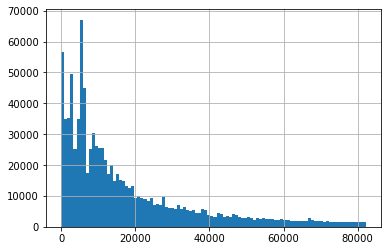

In [11]:
data['# FromNodeId'].hist(bins=100)
plt.show()

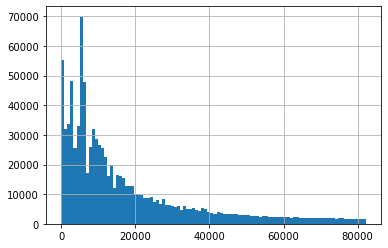

In [12]:
data['ToNodeId'].hist(bins=100)
plt.show()

## Preparando los datos

In [13]:
data.head()

,# FromNodeId,ToNodeId
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


In [14]:
data.columns = ['FromNodeId','ToNodeId']

In [15]:
data.head()

,FromNodeId,ToNodeId
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4


# Algoritmo PageRank

### Detectando ''trampas de araña''

In [16]:
def trampa_araña(aristas):
    '''
    @Autor: 
    Jonathan Martiñón
    
    @Descripción:
    Función que recibe lista de tuplas representado cada arista.
    El objetivo será encontrar aquellos con el mismo punto (y,y),
    y devolverlas.
    
    @Parámetros:
    aristas     Lista de tuplas con 2 elementos (x,y) que representan una arista    LIST
    destino     Lista con aquellos nodos que resultan en destino de una arista      LIST
    
    @Devuelve:
    arañas      Lista de arañas encontradas    LIST
    
    @Ejemplos:
    -----------
    
    aux = [(1,0),(2,0),(2,2),(6,6),(4,6),(1,4),(1,1)]
    trampa_araña(aux)
    >>> [6]
    
    -----------
    
    aux = [(1,0),(2,0)]
    trampa_araña(aux)
    >>> []
    
    -----------
    '''
    
    unique_aristas = list(set(aristas)) # Eliminaremos aquellas aristas repetidas
    arañas_cand =[] # Nuestra lista de arañas candidatas

    for i in range(len(unique_aristas)): # Ciclo que evaluará todas las aristas
        
        if unique_aristas[i][0] == unique_aristas[i][1]: # Si el valor de origen es igual al del destino
            arañas_cand.append(unique_aristas[i][0]) # Añadimos la 'araña candidata'
            
    # Una vez que tenemos nuestras 'arañas' candidatas, procedemos a eliminar repetidos
    unique_arañas = list(set(arañas_cand))
    
    # Ahora, para estar seguros que es una araña, contaremos todos aquellos cuyo origen sea nuestra 'araña'
    # y aparezca únicamente 1 vez, eso quiere decir que es una trampa de araña
    
    origen = [arista[0] for arista in unique_aristas] # Almacenaremos los orígenes una vez que tenemos aristas únicas 
    
    origen_freqs = Counter(origen) # Creamos un diccionario con el nodo y la cantidad de veces que es origen
    
    arañas = [] # Lista que almacenará las arañas finales
    
    # Crearemos un ciclo que comparará las arañas candidatas y verificará si tienen más de 1 origen.
    for araña in unique_arañas:
        if origen_freqs[araña] == 1: # Si el origen sólo aparece 1 vez en nuestra lista, es una trampa
            arañas.append(araña) # Añadimos la trampa a nuestras trampas finales.
    
    return arañas

In [17]:
# Convertimos nuestro dataframe a tuplas y eso lo pasamos a una lista
data_tuples = data.to_records(index=False).tolist()

In [18]:
arañas = trampa_araña(data_tuples) # Llamamos a nuestra función para detectar arañas.

In [19]:
print(f"Contamos con {len(arañas)} trampas de araña") # Mostramos la cantidad de trampas de arañas

Contamos con 6550 trampas de araña


In [20]:
print(f"Algunas de nuestras arañas son los nodos {arañas[0:5]}") # Mostramos algunas arañas

Algunas de nuestras arañas son los nodos [2618, 3174, 3175, 3181, 4894]


### Detectando callejones

In [21]:
def detecta_callejones(origen, destino):
    '''
    @Autor:
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de encontrar ''callejones sin salida'', es decir
    aquellos nodos que no llevan a ningún lado. Resulta en una simple
    comparación de listas entre aquellos que reciben, pero no mandan.
    
    Las 2 listas DEBEN TENER MISMA LONGITUD, puesto que la arista 0 será
    las coordenadas de origen[0] y destino[0], por lo que arista 'n' será
    origen[n] y destino[n]
    
    @Parámetros:
    origen      Lista con aquellos nodos que resultan en origen de una arista    LIST
    destino     Lista con aquellos nodos que resultan en destino de una arista   LIST
    
    @Devuelve:
    callejones  Lista de los nodos callejones                                    LIST
    
    @Ejemplos:
    ----------------
    origen = [6,8,2,1,5]
    destino = [4,2,3,4,3]
    detecta_callejones(origen,destino)
    >>> [3, 4]
    ----------------
    origen = [4,2,3,4,3]
    destino = [6,8,2,1,5]
    detecta_callejones(origen,destino)
    >>> [1,5,6,8]
    ----------------
    '''
    
    # Nos interesan los valores únicos para evitar evaluar
    # un valor más de una vez
    
    unique_origen = list(set(origen)) # Obtenemos orígenes únicos
    unique_destino = list(set(destino)) # Obtenemos destinos únicos
    
    posiciones = [] # Posiciones dónde se encuentra un callejón
    callejones = [] # Valores que representan un callejón
    
    # Realizaremos un ciclo encargado de buscar aquellos valores que sean destino
    # Pero no lleven a ningún otro lado (sean origen).
    
    for dest in unique_destino:
        
        if not dest in unique_origen: # En caso de que el destino no sea origen, quiere decir que es un callejón
            callejones.append(dest) # Agregamos el callejón detectado
            
    #Finalmente devolvemos la cantidad de callejones y los nodos callejones.
    return callejones
            

In [22]:
callejones = detecta_callejones(data['FromNodeId'],data['ToNodeId']) # Llamamos a nuestra función

In [23]:
print(f"Contamos con un total de {len(callejones)} callejones")

Contamos con un total de 3727 callejones


In [24]:
print(f"Algunos Nodos callejones son: los nodos {callejones[0:5]}")

Algunos Nodos callejones son: los nodos [2, 219, 228, 402, 448]


## Hasta el momento...
En este punto, somo conscientes que dentro de nuestros datos existen:
- 6,550 trampas de araña
- 3,727 Callejones

# Implementando PageRank

Se utilizaron las funciones de pagerank implementadas en clase, lo único que se modificó es que cada una recibirá la matriz de adyacencia ''normal'', y, dependiendo de cada caso, es que se encargará de modificar la matriz.

In [25]:
#PageRank normal
def pagerank(M, iter=100):
    inicio = time()
    n = M.shape[0]
    r = np.ones(n) / n
    for i in range(iter):
        print('Iteración {0}: r = {1}'.format(i,r))
        r = M @ r
    print(f"Tardó: {round(time() - inicio,3)} segundos")
    return r

#PageRank escalable
def pagerank_escalable_nocss(M3, beta = 0.8, iter=100):
    inicio = time()
    M = csr_matrix(M3)
    n = M.shape[0]
    r = np.ones(n) / n
    umbn = (1 - beta) / n
    for i in range(iter):
        print('Iteración {0}: r = {1}'.format(i,r))
        rhat = beta * M @ r
        r = rhat + umbn
        
    print(f"Tardó: {round(time() - inicio,3)} segundos")
    return r

#PageRank escalable con callejones
def pagerank_escalable_css(M, beta = 0.8, iter=20):
    inicio = time()
    n = M.shape[0]
    r = np.ones(n) / n
    for i in range(iter):
        print('Iteración {0}: r = {1}'.format(i,r))
        rhat = beta * M @ r
        umrsn = (1 - rhat.sum()) / n
        r = rhat + umrsn
        
    print(f"Tardó: {round(time() - inicio,3)} segundos")
    return r

**Necesitamos una función encargada de convertir nuestras uniones a una matriz**

In [26]:
def nodes_to_matrix(aristas):
    '''
    @Autor:
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de convertir un grafo a una matriz de adyacencia.
    Los nodos deberán ir de 0 a n-1 y ser enteros.
    
    @Parámetros:
    aristas      Lista de tuplas, donde cada tupla representa una arista (x,y)   LIST
    
    @Devuelve:
    matriz     Matriz de adyacencia del grafo.     NUMPY.NDARRAY  
    
    @Ejemplos:
    -------------------
    
    aristas = [(0,0),(0,1),(1,0),(1,2),(2,1)]
    nodes_to_matrix(aristas)
    >>> [[0.5, 0.5, 0. ],
         [0.5, 0. , 1. ],
         [0. , 0.5, 0. ]]
    
    -------------------
    
    aristas = [(0,1),(0,2),(0,3),(1,0),(1,3),(0,3),(2,0),(3,2),(3,1)]
    nodes_to_matrix(aristas)
    >>> [[0.   , 0.5       , 1.        , 0.        ],
         [0.333, 0.        , 0.        , 0.5       ],
         [0.333, 0.        , 0.        , 0.5       ],
         [0.333, 0.5       , 0.        , 0.        ]]
    
    -------------------
    '''
    
    # Creamos un grafo para que nos permita observar las direcciones
    # de dónde se dirige cada nodo de forma más sencilla
    
    G = nx.DiGraph()
    G.add_edges_from(aristas)
    
    # Una vez creado el grafo, basta con seleccionar un nodo
    # Para obtener todos los valores a los que apunta.
    
    nodos = list(G.nodes()) #Tomaremos los nodos
    
    # Iniciamos creando una matriz de 0's tamaño n x n 
    # donde 'n' representa el número de nodos
    matriz = bsr_matrix((len(nodos), len(nodos)))
    matriz = matriz.tolil()
    
    # Sabemos que contamos con nodos con Id de 0 a len(nodos)-1
    # Por lo que podemos tomar cada nodo como un índice
    for nodo in nodos:
        
        #Verificaremos todos los nodos a los que apunta
        apunta = list(G.neighbors(nodo)) # Almacenamos a los que apunta
        if len(apunta) != 0: # No todos son origen
            
            value = 1/len(apunta) # Se supone que es 1 / n el valor que reparte la página
            for to in apunta:
                # M[Ren][Col]
                matriz[to,nodo] = value # Colocamos nuestro valor en dicha posición.
                
    #Finalmente devolvemos la matriz
    return matriz

In [27]:
M = nodes_to_matrix(data_tuples)

In [28]:
def plotea(valores,metodo):
    '''
    @Autor:
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de plotear en una gráfica de barras los 10 primeros
    valores.
    
    @Parámetros:
    valores   Valores a graficar.                     LIST
    metodo    Datos en el título de nuestro grafo     STR
    
    '''
    
    nodos = np.argsort(valores)[::-1]
    nodos = nodos[:10]
    
    colors = ['dodgerblue','deepskyblue','darkturquoise','lightskyblue','aquamarine',
             'palegreen','mediumspringgreen','mediumseagreen','limegreen','teal']
    
    plt.figure(figsize=(8,3))
    plt.title(f'Top 10\n Nodos con mayor ranking\nmétodo: {metodo}')
    plt.ylabel('Ranking')
    plt.xlabel('Nodo')
    
    plt.bar(np.arange(len(nodos)),valores[nodos], color=colors )
    plt.xticks(np.arange(len(nodos)),nodos)

In [29]:
def obten_destinos_origenes(valores,aristas):
    '''
    @Autor:
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de devolver la cantidad de nodos a los que va 1 nodo
    y todos aquellos que apuntan a él.
    
    @Parámetros:
    valores  Lista de nodos a ubicar sus datos                       LIST
    aristas  Conjunto de datos que contiene cada unión de los nodos  DATAFRAME
    
    @Devuelve:
    origen   Lista del valor de cada nodo en orden      LIST
    destino  Lista de nodos a los que apunta al nodo    LIST
    nodos    Lista de nodos ordenadas de mayor a menor  LIST
    '''
    origen = []
    destino = []
    
    nodos = np.argsort(valores)[::-1]
    nodos = nodos[:10]
    
    valores = valores[nodos]
    
    for nodo in nodos: # Obtenemos datos de acuerdo al orden 
        origen.append(len(aristas[aristas['FromNodeId']==nodo])) # Nodos a los que apunta
        destino.append(len(aristas[aristas['ToNodeId']==nodo])) # Nodos que le apuntan
        
    return origen, destino, nodos # Devolvemos
    

In [30]:
def grafica_datos(nodos, origen, destino):
    '''
    @Autor: 
    Jonathan Martiñón
    
    @Descripción:
    Función encargada de graficar los datos de destino y origen acorde al nodo
    
    @Parámetros:
    origen   Lista de nodos que apuntan al nodo         LIST
    destino  Lista de nodos a los que apunta al nodo    LIST
    nodos    Lista de nodos ordenadas de mayor a menor  LIST
    '''
    
    n = np.arange(len(nodos))
    
    plt.figure(figsize=(8,3))
    plt.plot(n,origen, c ='green',label='Apuntan')
    plt.plot(n,origen, c ='green',marker ='o')
    plt.plot(n,destino,c='blue', label='Le apuntan')
    plt.plot(n,destino,c='blue',marker ='o')
    plt.xticks(n,nodos)
    
    plt.title("Top 10 nodos con sus 'vecinos'")
    plt.ylabel("Cantidad")
    plt.xlabel("Nodo")
    plt.legend()
    
    plt.show()

# Probando PageRank 'normal'

In [31]:
aux = pagerank(M,iter=50)
a = np.argsort(aux)[::-1]
print("\nPáginas con mayor ranking")
print(list(zip(a[:5],aux[a[:5]])))

Iteración 0: r = [1.21701879e-05 1.21701879e-05 1.21701879e-05 ... 1.21701879e-05
 1.21701879e-05 1.21701879e-05]
Iteración 1: r = [1.79277763e-04 5.12871938e-05 1.72960853e-05 ... 1.11560056e-05
 1.11560056e-05 4.05672930e-06]
Iteración 2: r = [1.74984615e-04 1.01551464e-04 1.14763677e-05 ... 1.12405208e-05
 1.12405208e-05 2.70448620e-06]
Iteración 3: r = [1.90840013e-04 1.09452906e-04 1.50393253e-05 ... 1.12334778e-05
 1.12334778e-05 2.25373850e-06]
Iteración 4: r = [1.87897526e-04 1.16264437e-04 1.47042452e-05 ... 1.11563108e-05
 1.11563108e-05 1.95324003e-06]
Iteración 5: r = [1.88150210e-04 1.17059165e-04 1.51675319e-05 ... 1.11055796e-05
 1.11055796e-05 1.72786618e-06]
Iteración 6: r = [1.85645177e-04 1.17085499e-04 1.50125783e-05 ... 1.10269985e-05
 1.10269985e-05 1.54506604e-06]
Iteración 7: r = [1.83046504e-04 1.15815407e-04 1.48948855e-05 ... 1.09436957e-05
 1.09436957e-05 1.39779265e-06]
Iteración 8: r = [1.80082236e-04 1.14257167e-04 1.46783057e-05 ... 1.08460791e-05
 1.084

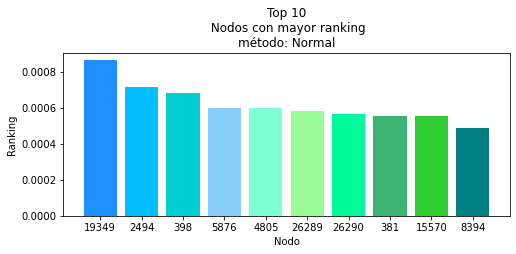

In [32]:
plotea(aux,'Normal')

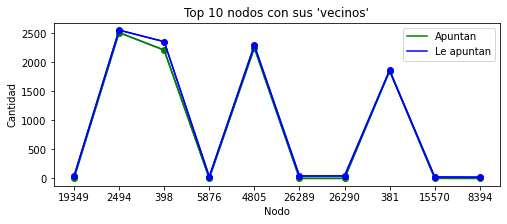

In [33]:
ori,dest,nod = obten_destinos_origenes(aux,data)
grafica_datos(nod,ori,dest)

# Probando PageRank 'escalable' sin callejones

In [34]:
aux = pagerank_escalable_nocss(M,iter=50)
a = np.argsort(aux)[::-1]
print("\nPáginas con mayor ranking")
print(list(zip(a[:5],aux[a[:5]])))

Iteración 0: r = [1.21701879e-05 1.21701879e-05 1.21701879e-05 ... 1.21701879e-05
 1.21701879e-05 1.21701879e-05]
Iteración 1: r = [1.45856248e-04 4.34637926e-05 1.62709058e-05 ... 1.13588420e-05
 1.13588420e-05 5.67942102e-06]
Iteración 2: r = [1.43108633e-04 7.56329254e-05 1.25462866e-05 ... 1.14129318e-05
 1.14129318e-05 4.81398544e-06]
Iteración 3: r = [1.51226597e-04 7.96784638e-05 1.43705208e-05 ... 1.14093258e-05
 1.14093258e-05 4.58320262e-06]
Iteración 4: r = [1.50021355e-04 8.24684667e-05 1.42332720e-05 ... 1.13777182e-05
 1.13777182e-05 4.46011844e-06]
Iteración 5: r = [1.50104154e-04 8.27288835e-05 1.43850818e-05 ... 1.13610946e-05
 1.13610946e-05 4.38626794e-06]
Iteración 6: r = [1.49447474e-04 8.27357867e-05 1.43444617e-05 ... 1.13404950e-05
 1.13404950e-05 4.33834798e-06]
Iteración 7: r = [1.48902493e-04 8.24694291e-05 1.43197797e-05 ... 1.13230251e-05
 1.13230251e-05 4.30746251e-06]
Iteración 8: r = [1.48405172e-04 8.22079999e-05 1.42834436e-05 ... 1.13066478e-05
 1.130

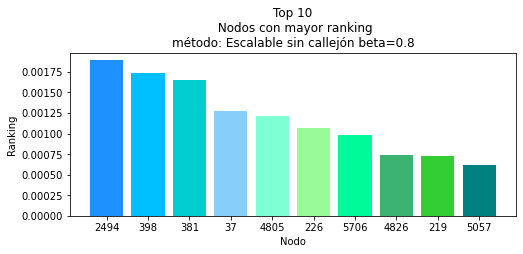

In [35]:
plotea(aux,'Escalable sin callejón beta=0.8')

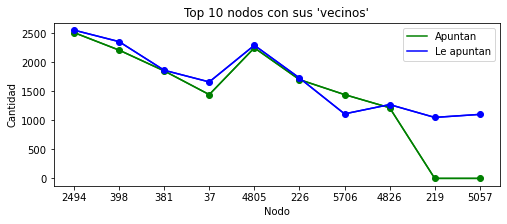

In [36]:
ori,dest,nod = obten_destinos_origenes(aux,data)
grafica_datos(nod,ori,dest)

In [37]:
aux = pagerank_escalable_nocss(M,beta=0.9,iter=50)
a = np.argsort(aux)[::-1]
print("\nPáginas con mayor ranking")
print(list(zip(a[:5],aux[a[:5]])))

Iteración 0: r = [1.21701879e-05 1.21701879e-05 1.21701879e-05 ... 1.21701879e-05
 1.21701879e-05 1.21701879e-05]
Iteración 1: r = [1.62567005e-04 4.73754932e-05 1.67834956e-05 ... 1.12574238e-05
 1.12574238e-05 4.86807516e-06]
Iteración 2: r = [1.59089556e-04 8.80895519e-05 1.20695243e-05 ... 1.13258811e-05
 1.13258811e-05 3.77275825e-06]
Iteración 3: r = [1.70648141e-04 9.38497032e-05 1.46669204e-05 ... 1.13207468e-05
 1.13207468e-05 3.44416318e-06]
Iteración 4: r = [1.68717575e-04 9.83187485e-05 1.44470743e-05 ... 1.12701175e-05
 1.12701175e-05 3.24700613e-06]
Iteración 5: r = [1.68866782e-04 9.87880280e-05 1.47206405e-05 ... 1.12401613e-05
 1.12401613e-05 3.11392513e-06]
Iteración 6: r = [1.67535505e-04 9.88020228e-05 1.46382918e-05 ... 1.11984000e-05
 1.11984000e-05 3.01677764e-06]
Iteración 7: r = [1.66292568e-04 9.81945416e-05 1.45819997e-05 ... 1.11585566e-05
 1.11585566e-05 2.94633723e-06]
Iteración 8: r = [1.65016548e-04 9.75237706e-05 1.44887692e-05 ... 1.11165358e-05
 1.111

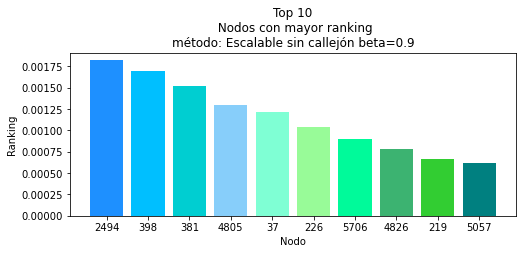

In [38]:
plotea(aux,'Escalable sin callejón beta=0.9')

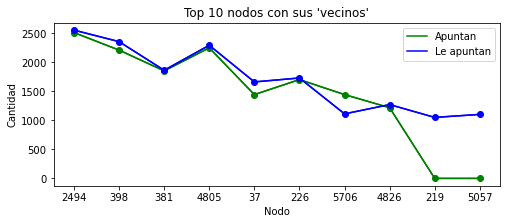

In [39]:
ori,dest,nod = obten_destinos_origenes(aux,data)
grafica_datos(nod,ori,dest)

# Probando PageRank 'escalable' con callejones

In [40]:
aux = pagerank_escalable_css(csr_matrix(M),iter=50)
a = np.argsort(aux)[::-1]
print("\nPáginas con mayor ranking")
print(list(zip(a[:5],aux[a[:5]])))

Iteración 0: r = [1.21701879e-05 1.21701879e-05 1.21701879e-05 ... 1.21701879e-05
 1.21701879e-05 1.21701879e-05]
Iteración 1: r = [1.46297863e-04 4.39054077e-05 1.67125210e-05 ... 1.18004572e-05
 1.18004572e-05 6.12103616e-06]
Iteración 2: r = [1.48602104e-04 7.74109192e-05 1.33375421e-05 ... 1.20259450e-05
 1.20259450e-05 5.22091164e-06]
Iteración 3: r = [1.58935076e-04 8.32487398e-05 1.52028432e-05 ... 1.21194609e-05
 1.21194609e-05 4.96015929e-06]
Iteración 4: r = [1.59255450e-04 8.70795404e-05 1.51909110e-05 ... 1.21653904e-05
 1.21653904e-05 4.84053825e-06]
Iteración 5: r = [1.60391499e-04 8.80755813e-05 1.54276090e-05 ... 1.22071190e-05
 1.22071190e-05 4.77056466e-06]
Iteración 6: r = [1.60533035e-04 8.86136343e-05 1.54537871e-05 ... 1.22326265e-05
 1.22326265e-05 4.72660911e-06]
Iteración 7: r = [1.60599265e-04 8.87477965e-05 1.54795066e-05 ... 1.22512449e-05
 1.22512449e-05 4.69871094e-06]
Iteración 8: r = [1.60572834e-04 8.87916382e-05 1.54818454e-05 ... 1.22631817e-05
 1.226

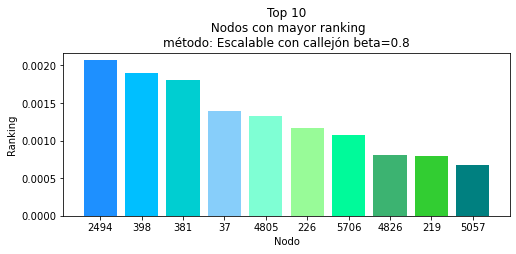

In [41]:
plotea(aux,'Escalable con callejón beta=0.8')

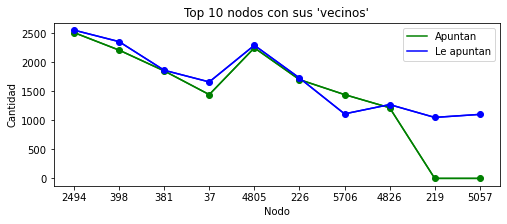

In [42]:
ori,dest,nod = obten_destinos_origenes(aux,data)
grafica_datos(nod,ori,dest)

In [43]:
aux = pagerank_escalable_css(csr_matrix(M),beta=0.9,iter=50)
a = np.argsort(aux)[::-1]
print("\nPáginas con mayor ranking")
print(list(zip(a[:5],aux[a[:5]])))

Iteración 0: r = [1.21701879e-05 1.21701879e-05 1.21701879e-05 ... 1.21701879e-05
 1.21701879e-05 1.21701879e-05]
Iteración 1: r = [1.63063822e-04 4.78723102e-05 1.72803126e-05 ... 1.17542408e-05
 1.17542408e-05 5.36489219e-06]
Iteración 2: r = [1.65980128e-04 9.02777232e-05 1.30088549e-05 ... 1.20396239e-05
 1.20396239e-05 4.22567209e-06]
Iteración 3: r = [1.80692503e-04 9.85897763e-05 1.56647231e-05 ... 1.21727745e-05
 1.21727745e-05 3.85440557e-06]
Iteración 4: r = [1.81205680e-04 1.04725978e-04 1.56456100e-05 ... 1.22463445e-05
 1.22463445e-05 3.66279579e-06]
Iteración 5: r = [1.83252877e-04 1.06520876e-04 1.60721475e-05 ... 1.23215410e-05
 1.23215410e-05 3.53670111e-06]
Iteración 6: r = [1.83539811e-04 1.07611664e-04 1.61252181e-05 ... 1.23732518e-05
 1.23732518e-05 3.44759061e-06]
Iteración 7: r = [1.83690863e-04 1.07917647e-04 1.61838764e-05 ... 1.24157149e-05
 1.24157149e-05 3.38396333e-06]
Iteración 8: r = [1.83623047e-04 1.08030136e-04 1.61898772e-05 ... 1.24463420e-05
 1.244

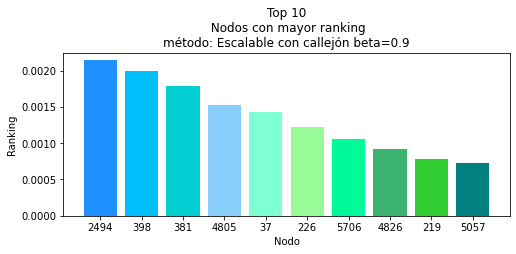

In [44]:
plotea(aux,'Escalable con callejón beta=0.9')

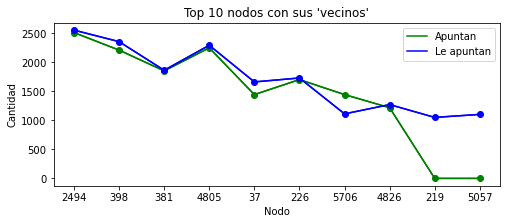

In [45]:
ori,dest,nod = obten_destinos_origenes(aux,data)
grafica_datos(nod,ori,dest)

# Conclusiones.

En el presente notebook se compararon los rendimientos entre los algoritmos: **PageRank**, **PageRank escalable sin callejones** y **PageRank escalable con callejones**. Probablemente, aquél que se tardó menos iteraciones fue: **PageRank escalable con callejones beta = 0.8**. sin embargo, aquél que dió la puntuación más alta dentro de sus rankings fue: **PageRank escalable con callejones beta = 0.9**. El que dió la menor puntuación fue **PageRank (normal)**
- **PageRank**
    * 50 iteraciones
    * Nodos con mayor ranking: \[ 19 349, <span style="color:red">2 494 </span>, 398, 5 876,<span style="color:red"> 4 805</span>, 26 289, 26 290, <span style="color:red">381 </span>, 15 570, 8 394\]
    * Nodos balanceados (Apuntan, le apuntan)
    * Mayor valor 0.0008636
    * No se ve un punto que absorba
- **PageRank escalable sin callejones beta = 0.8:**
    * 50 iteraciones
    * Nodos con mayor ranking: \[ <span style="color:red">2 494 </span>, <span style="color:red">398 </span>, <span style="color:red">381 </span>, 37,<span style="color:red"> 4 805</span>, 226, 5 706, 4 826, 219, 5 057 \]
    * Los últimos 2 son callejones
    * Mayor valor 0.001888
    * Aparenta mantenerse desde la iteración 9
- **PageRank escalable sin callejones beta = 0.9:**
    * 50 iteraciones
    * Nodos con mayor ranking \[ <span style="color:red">2 494 </span>, <span style="color:red">398 </span>, <span style="color:red">381 </span>, <span style="color:red">4 805</span>, 37, 226, 5 706, 4 826, 219, 5 057 \]
    * Los 2 últimos son callejones
    * Mayor valor 0.001820
    * Aparenta mantenerse desde la iteración 43
- **PageRank escalable con callejones beta = 0.8:**
    * 50 iteraciones
    * Nodos con mayor ranking \[ <span style="color:red">2 494 </span>, <span style="color:red">398 </span>, <span style="color:red">381 </span>, <span style="color:red">4 805</span>, 37, 226, 5 706, 4 826, 219, 5 057 \]
    * Los 2 últimos son callejones
    * Mayor valor 0.002066
    * Aparenta mantenerse desde la iteración 9
- **PageRank escalable con callejones beta = 0.9:**
    * 50 iteraciones
    * Nodos con mayor ranking \[ <span style="color:red">2 494 </span>, <span style="color:red">398 </span>, <span style="color:red">381 </span>,<span style="color:red"> 4 805</span>, 37, 226, 5 706, 4 826, 219, 5 075 \]
    * Los 2 últimos son callejones
    * Mayor valor 0.002138
    * Aparenta mantenerse desde la iteración 18
    
Mejores gráficas: 
- **Escalable sin callejones beta=0.9**
- **Escalable con callejones beta=0.9**

Exceptuando PageRank (normal), todos presentan los mismos valores.